In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scienceplots
import pandas as pd
from tensorflow import keras
from utils.helper import (
    folder_to_sequence,
    MinMaxScaler_AE,
)

plt.style.use(["science", "ieee", "notebook"])

plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = (9, 4)

In [2]:
# carregando os dados para a memória
DEFAULT_WS = 20
normal = folder_to_sequence("VIDRO-B3", DEFAULT_WS)
anomaly1 = folder_to_sequence("VIDRO-B2", DEFAULT_WS)
anomaly2 = folder_to_sequence("ANOMALIAS/B3+100g", DEFAULT_WS)
anomaly3 = folder_to_sequence("ANOMALIAS/vazoes-aleatorias", DEFAULT_WS)

100%|██████████| 1/1 [00:00<00:00, 25.77it/s]


In [3]:
scaler = MinMaxScaler_AE()
scaler.fit(normal)

In [4]:
autoencoder = keras.models.load_model("best_model.keras")

In [5]:
# 1) Analisar os erros no conjunto de treino

def get_error_dist(data : np.ndarray, color:str, cumulative=False):
    xnorm = scaler.transform(data)
    xpred = autoencoder.predict(xnorm)

    xnorm = np.squeeze(xnorm, axis=-1)
    errors = np.mean(np.abs(xnorm - xpred), axis=1)

    max_error = np.max(errors)

    fig, ax = plt.subplots()
    ax.grid()
    sns.histplot(errors, kde=True, bins=50, color = color, stat = "percent", ax = ax, cumulative = cumulative)
    ax.set_ylabel(r"Porcentagem (%)")
    ax.set_xlabel("Erro médio absoluto")

    return ax, max_error, errors

403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


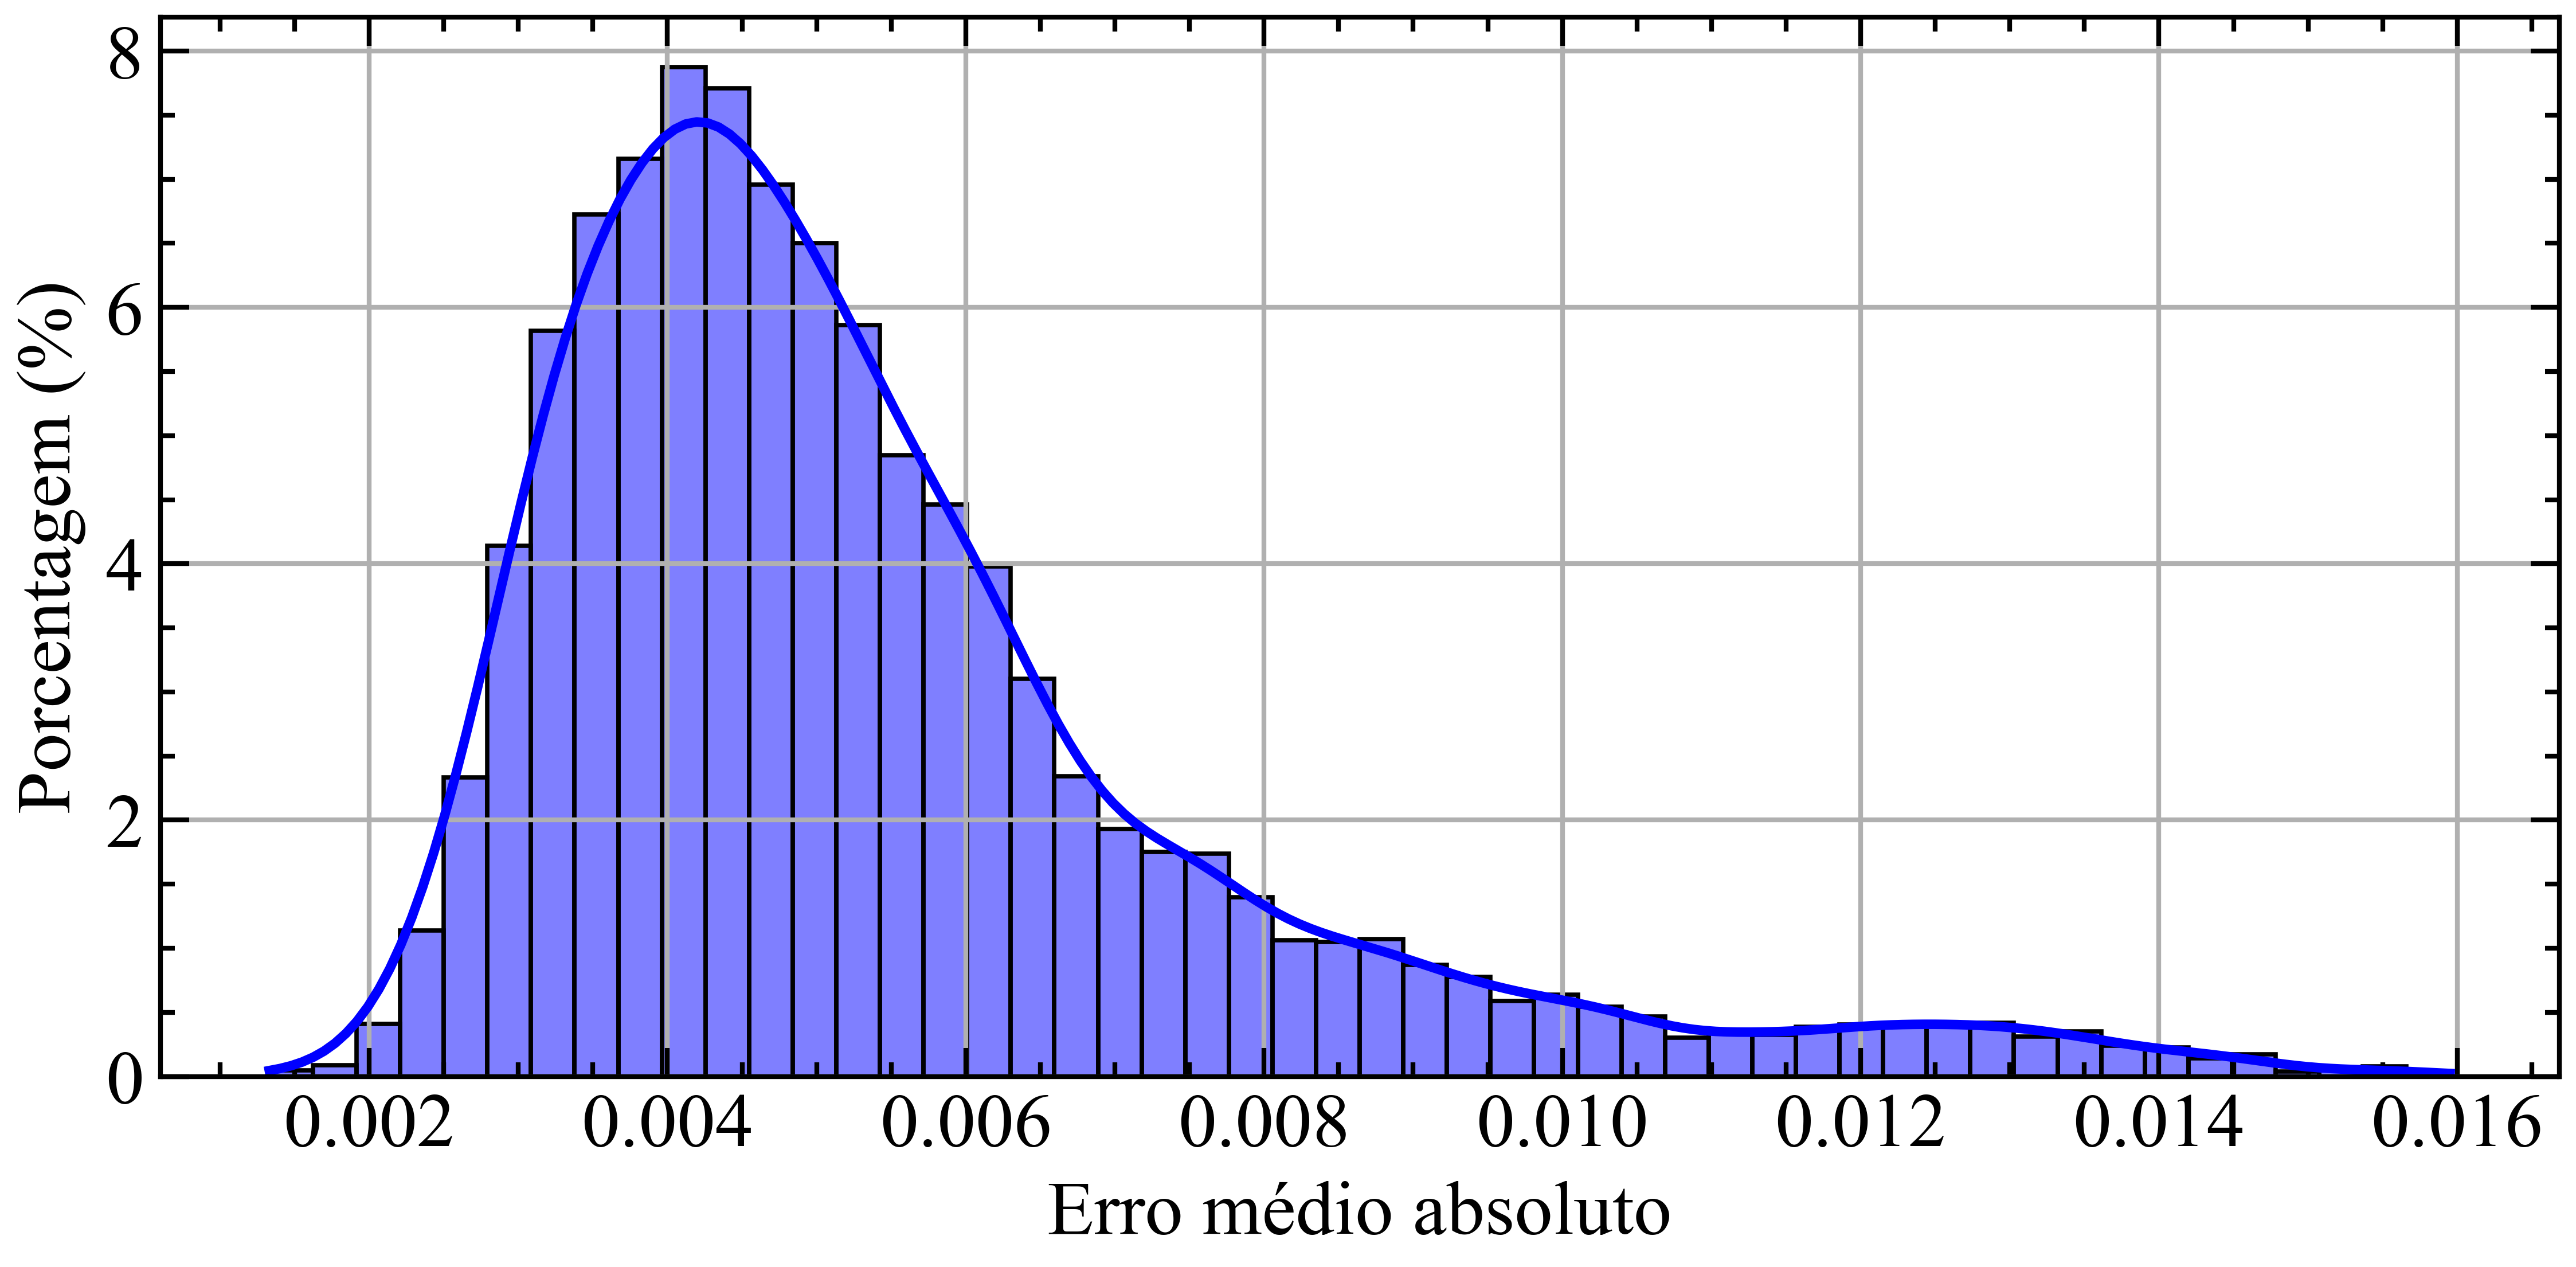

In [6]:
ax, max_error, _ = get_error_dist(normal, color="blue")

In [7]:
def get_accuracy(errors: np.ndarray, threshold: float) -> float:
    anomalies = errors > threshold
    accuracy: float = np.mean(anomalies)
    return accuracy

336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


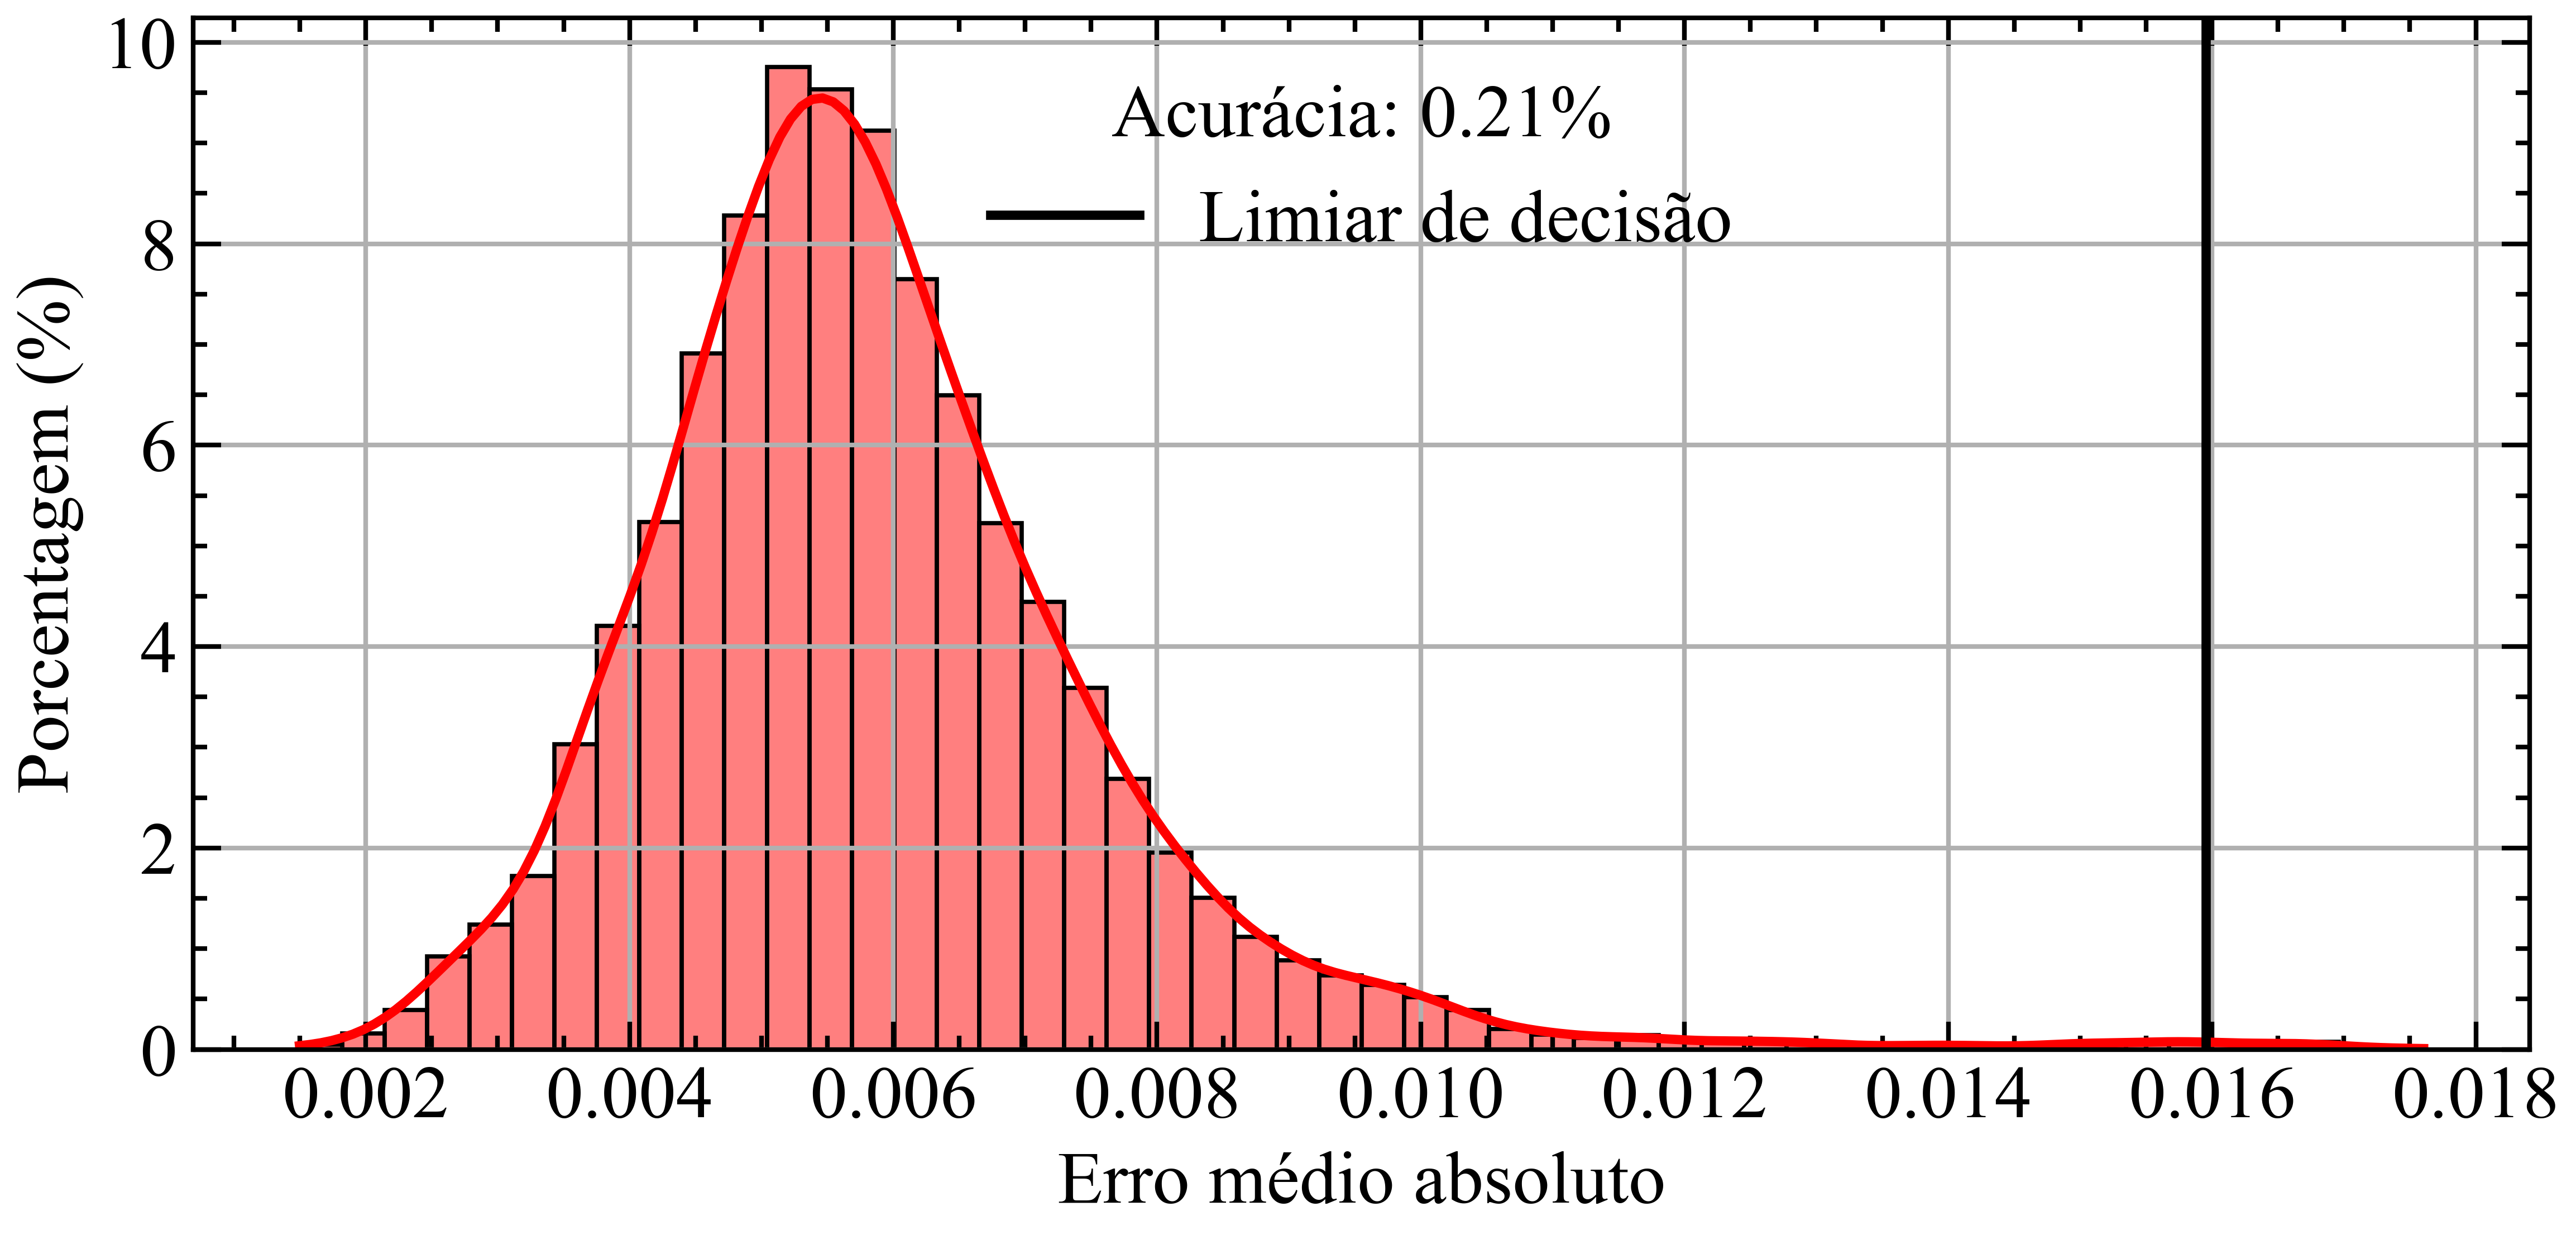

In [8]:
ax2, _, errors2 = get_error_dist(anomaly1, "red")
ax2.axvline(max_error, label="Limiar de decisão")
ax2.legend(title=f"Acurácia: {get_accuracy(errors2, max_error) * 100:.2f}%")

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


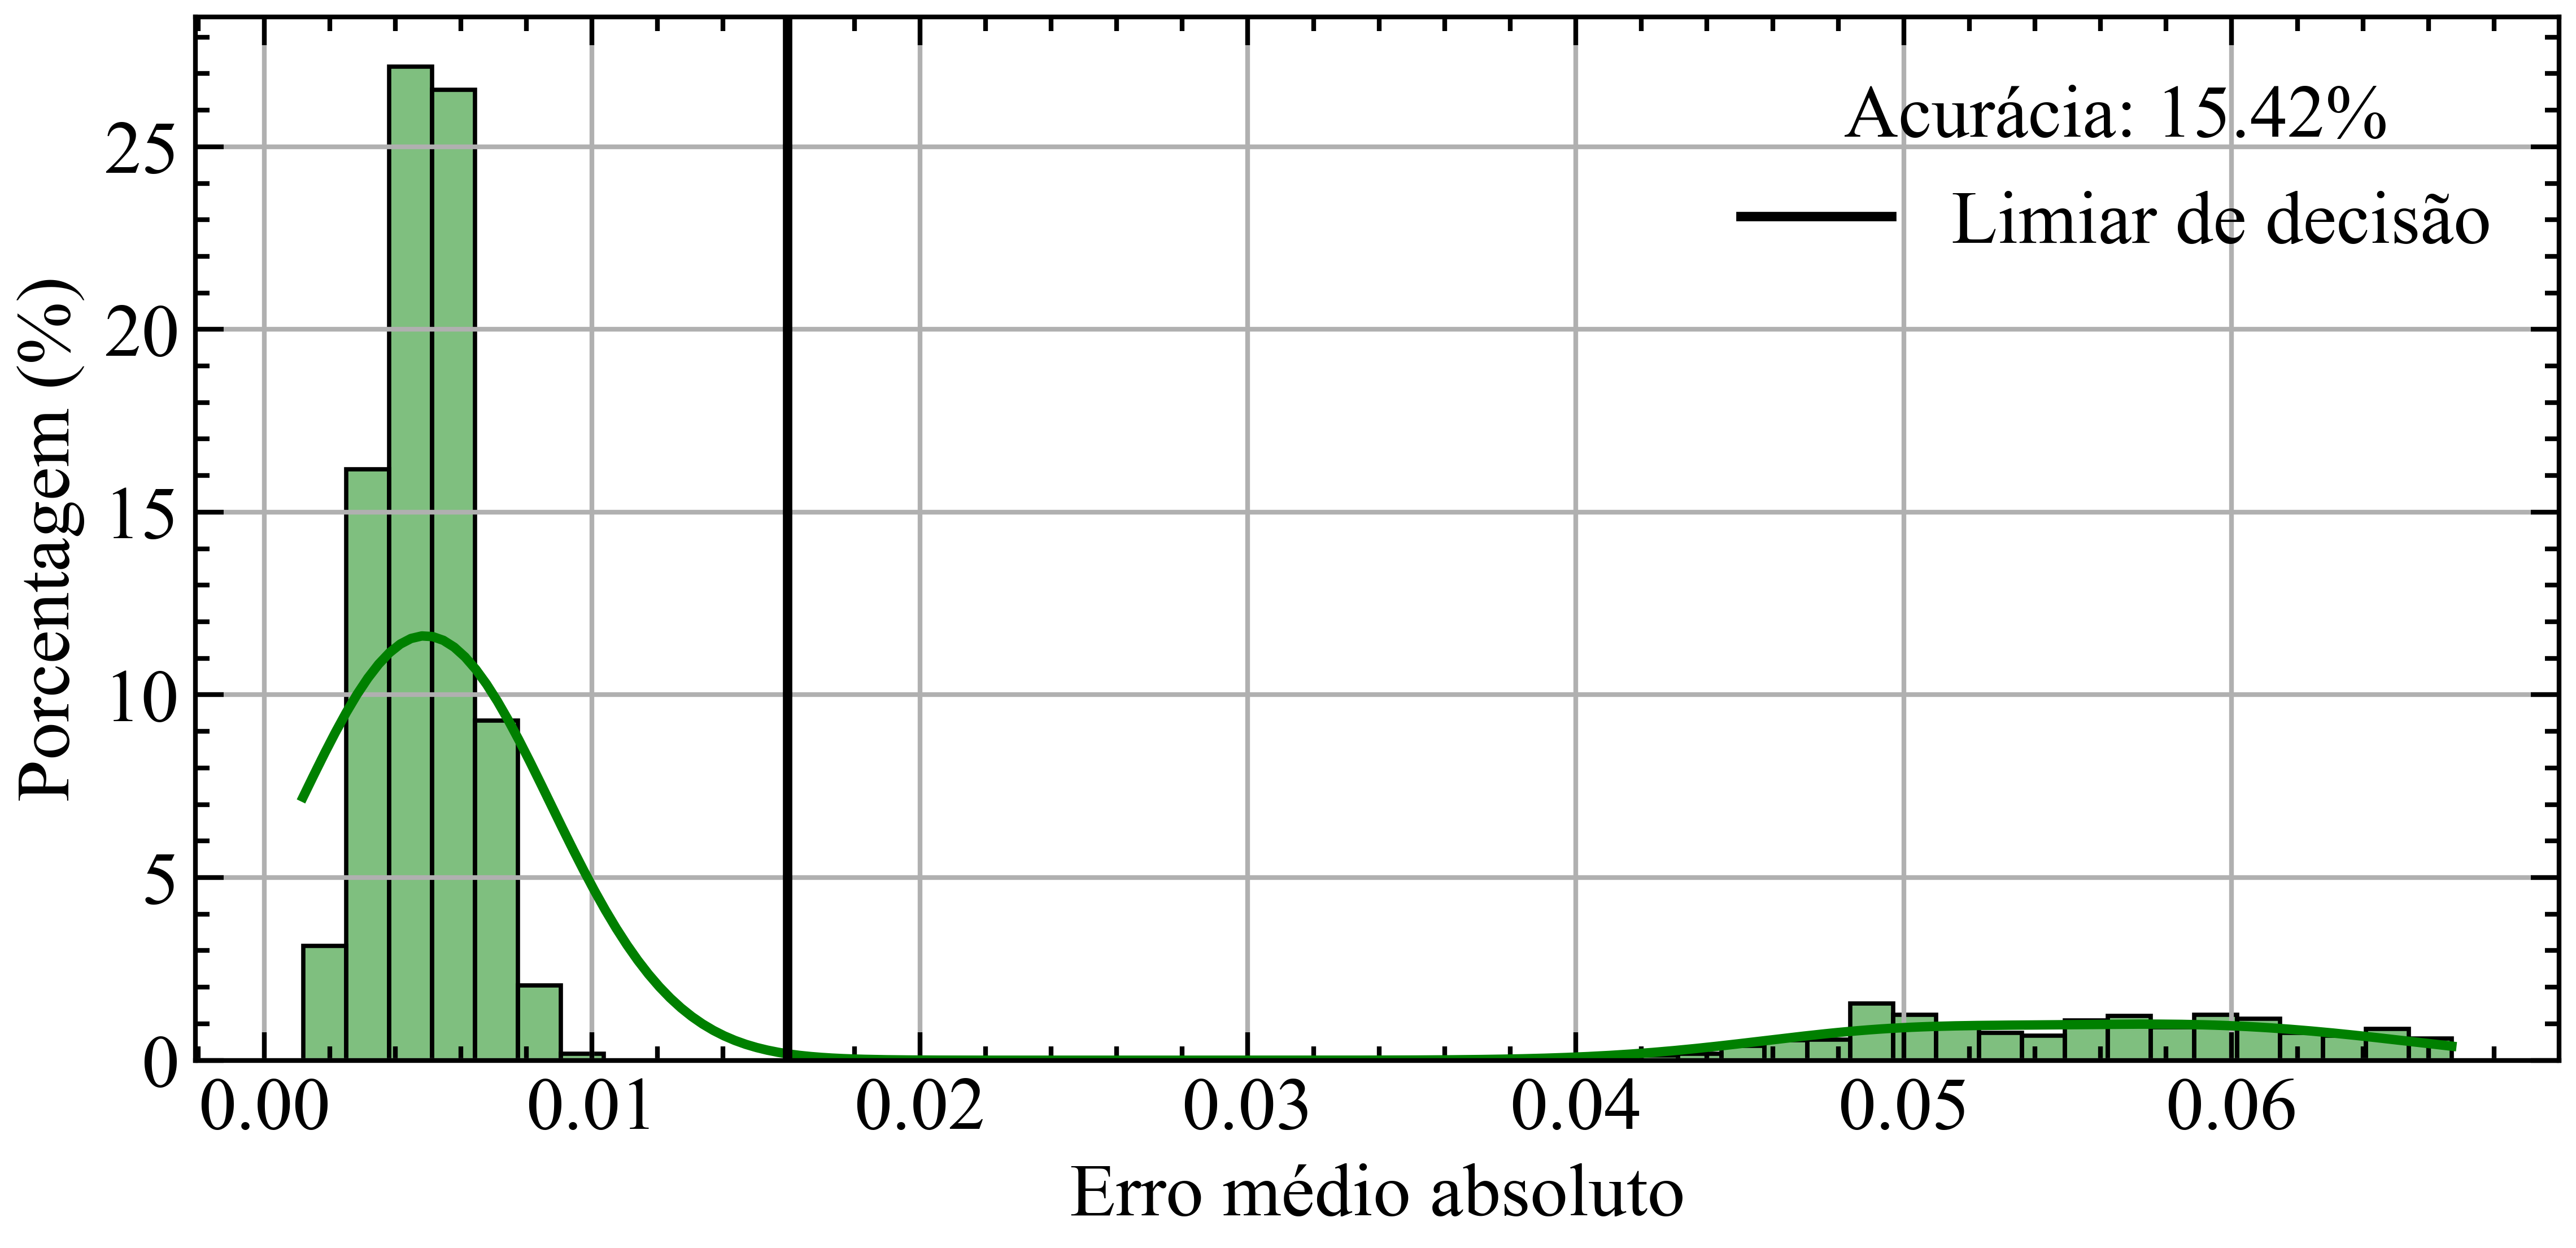

In [9]:
ax3, _, errors3 = get_error_dist(anomaly2, "green")
ax3.axvline(max_error, label="Limiar de decisão")
ax3.legend(title=f"Acurácia: {get_accuracy(errors3, max_error) * 100:.2f}%")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


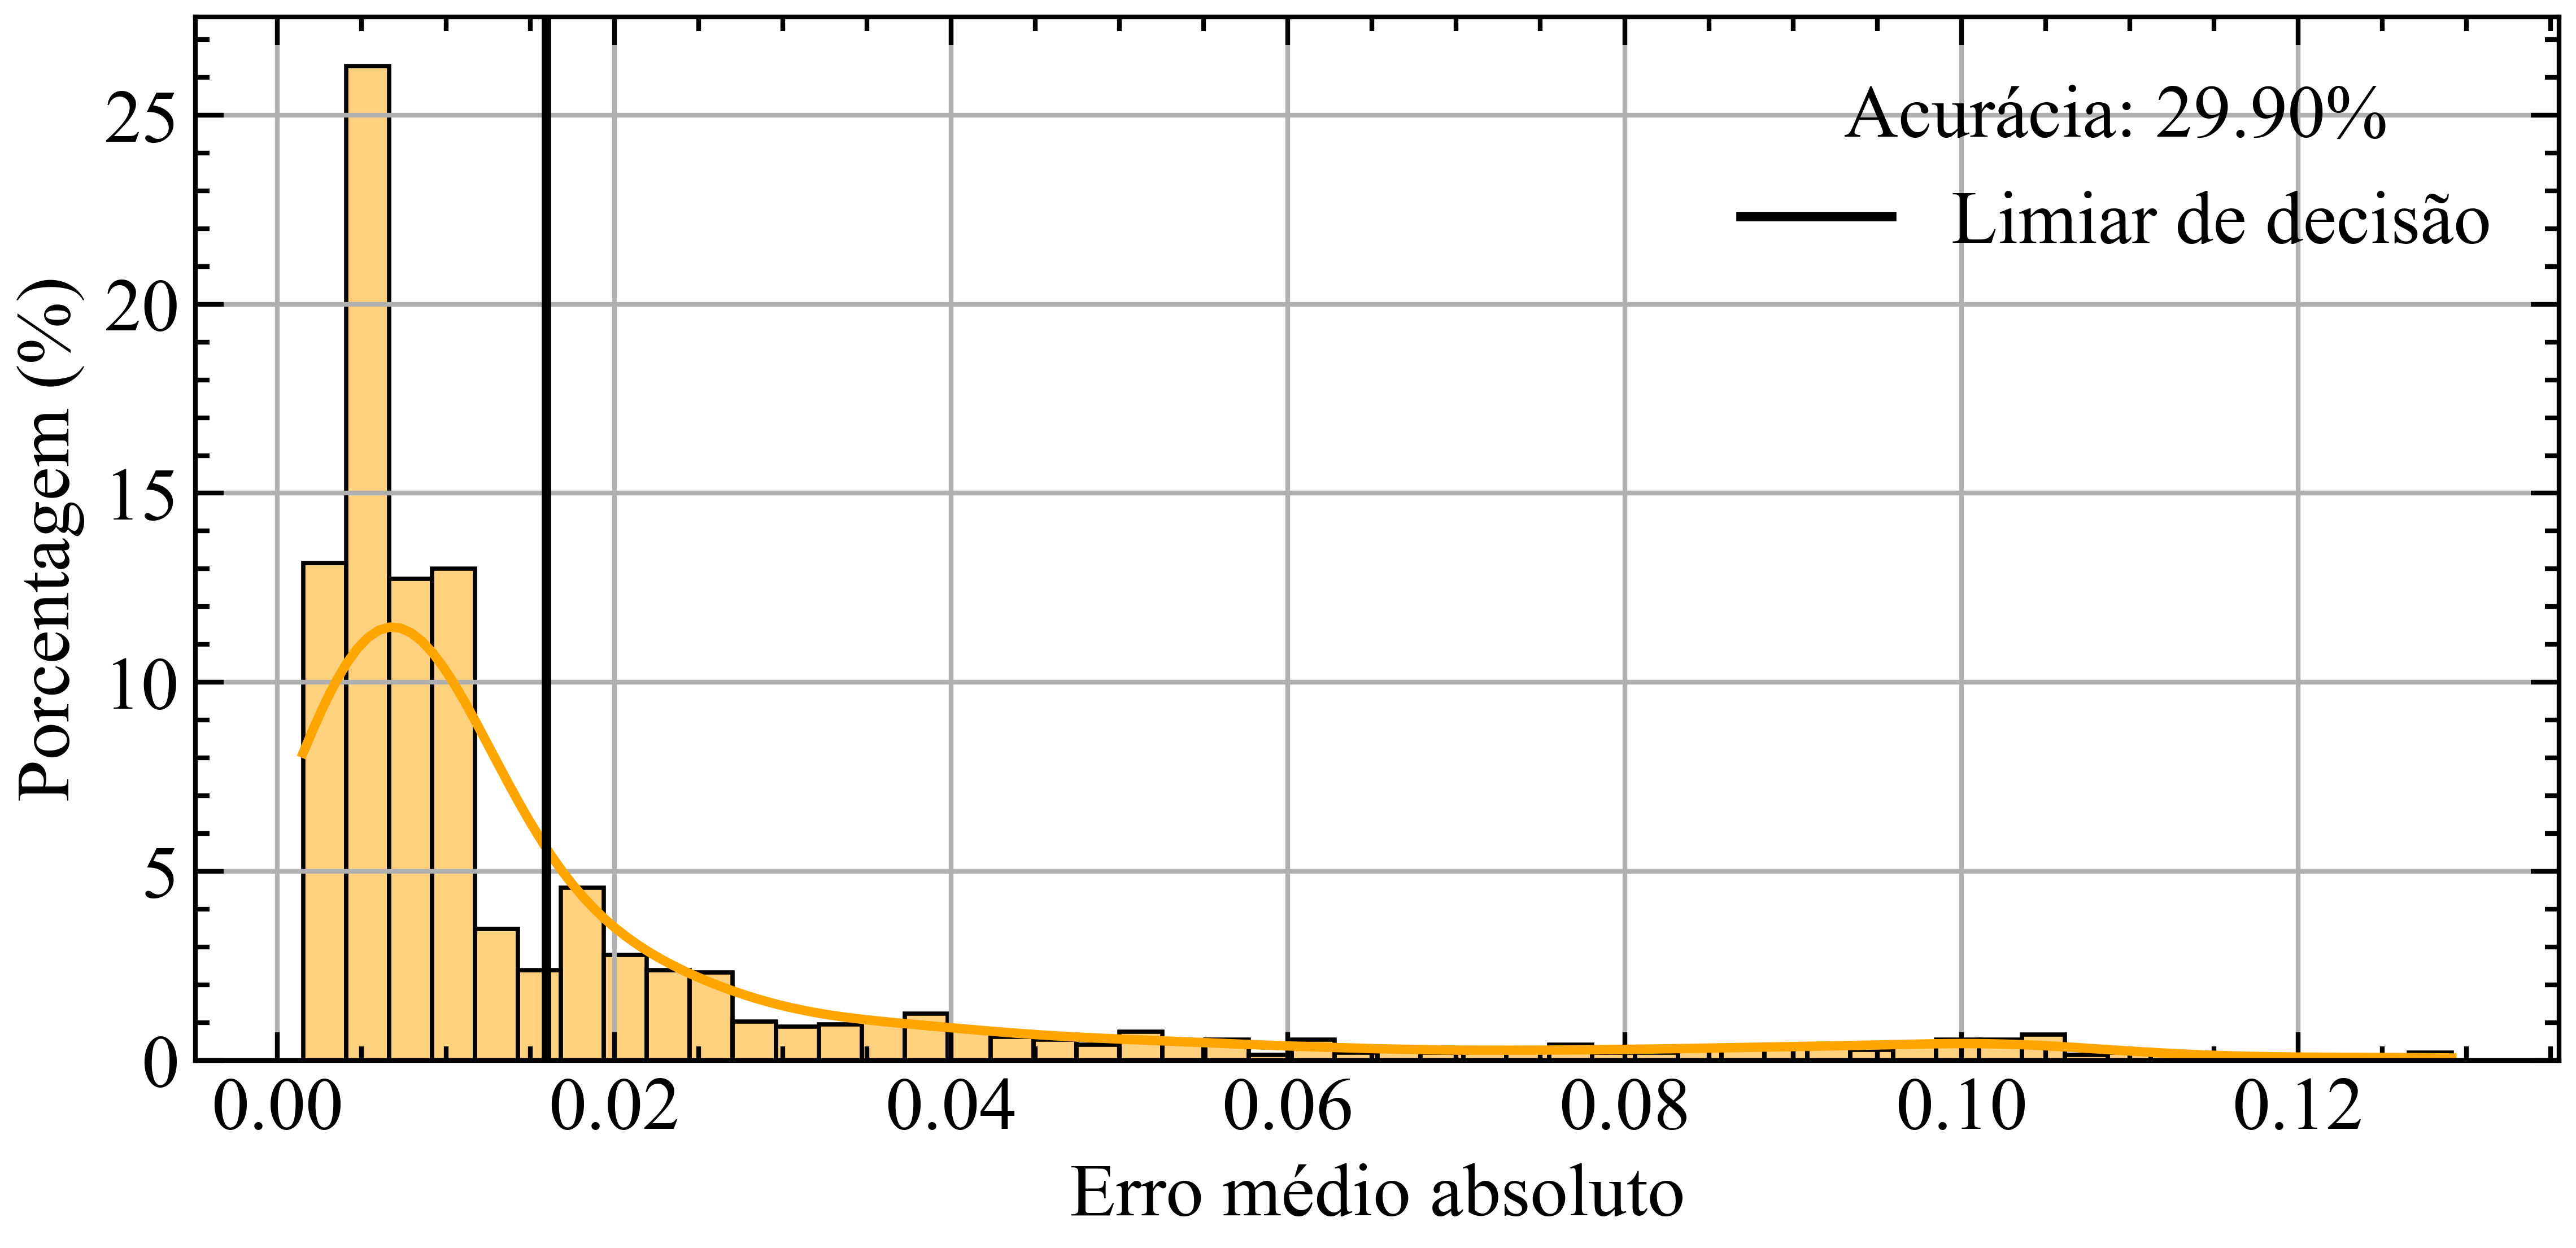

In [10]:
ax4, _, errors4 = get_error_dist(anomaly3, "orange")
ax4.axvline(max_error, label="Limiar de decisão")
ax4.legend(title=f"Acurácia: {get_accuracy(errors4, max_error) * 100:.2f}%")